In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, GRU, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [12]:
# RMSE
CNN = []
LSTM = []
CNN_LSTM = []


In [13]:
CNN = [1322.3026154611282, 543.9853041534521, 1725.8623679611437, 3636.4812549312055, 694.431858106124, 598.4554642400716, 857.1590104855808]
LSTM = [543.8416601727732, 248.14369339908737, 157.10931029821293, 149.17044931553625, 196.56844960948445, 130.2606991288356, 110.06271795484088]
CNN_LSTM = [449.6366895682467, 297.5355765702671, 124.31891649125721, 151.93737693943868, 252.36132333044523, 191.59835833516385, 117.82667714497974]

In [14]:
print(CNN_LSTM)

[449.6366895682467, 297.5355765702671, 124.31891649125721, 151.93737693943868, 252.36132333044523, 191.59835833516385, 117.82667714497974]


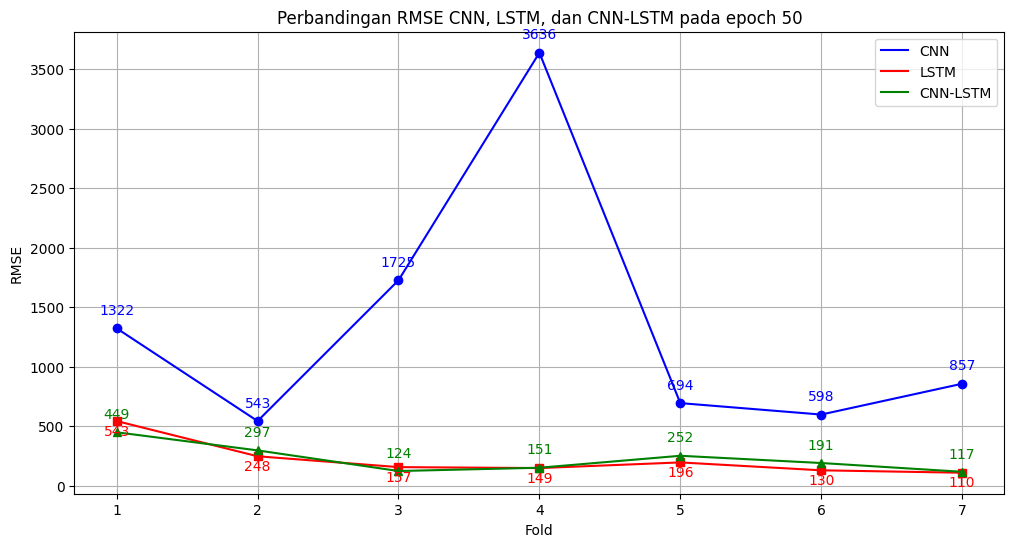

In [15]:
# Folds
folds = np.arange(1, len(CNN) + 1)

# Plotting
plt.figure(figsize=(12, 6))

# Plot CNN
cnn_folds, cnn_scores = [], []
for i in range(len(CNN)):
    if CNN[i] <= 3000000:
        plt.plot(folds[i], CNN[i], 'bo')
        plt.annotate(f'{int(CNN[i])}', (folds[i], CNN[i]), textcoords="offset points", xytext=(0,10), ha='center', color='blue')
        cnn_folds.append(folds[i])
        cnn_scores.append(CNN[i])

plt.plot(cnn_folds, cnn_scores, 'b-', label='CNN')

# Plot LSTM
lstm_folds, lstm_scores = [], []
for i in range(len(LSTM)):
    if LSTM[i] <= 3000000:
        plt.plot(folds[i], LSTM[i], 'rs')
        plt.annotate(f'{int(LSTM[i])}', (folds[i], LSTM[i]), textcoords="offset points", xytext=(0,-10), ha='center', color='red')
        lstm_folds.append(folds[i])
        lstm_scores.append(LSTM[i])

plt.plot(lstm_folds, lstm_scores, 'r-', label='LSTM')

# Plot CNN-LSTM
cnn_lstm_folds, cnn_lstm_scores = [], []
for i in range(len(CNN_LSTM)):
    if CNN_LSTM[i] <= 3000000:
        plt.plot(folds[i], CNN_LSTM[i], 'g^')
        plt.annotate(f'{int(CNN_LSTM[i])}', (folds[i], CNN_LSTM[i]), textcoords="offset points", xytext=(0,10), ha='center', color='green')
        cnn_lstm_folds.append(folds[i])
        cnn_lstm_scores.append(CNN_LSTM[i])

plt.plot(cnn_lstm_folds, cnn_lstm_scores, 'g-', label='CNN-LSTM')

plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Perbandingan RMSE CNN, LSTM, dan CNN-LSTM pada epoch 50')
plt.yscale('linear')  # Use linear scale for R2 score
plt.legend()
plt.grid(True)

# Show the plot
plt.show()